In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import skimage.io as io
import os
from pycocotools.coco import COCO
import pathlib
import glob

In [2]:
img_dir = "D:\\Personal\\Sanku_tips\\Object_Detection_COCO\\Object_Detection\\COCOdataset2017\\images\\val\\"
all_image_paths = list(glob.glob(img_dir + '*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]

In [3]:
len(all_image_paths)

5000

In [4]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [256, 256])
  image /= 255.0  # normalize to [0,1] range

  return image

In [5]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

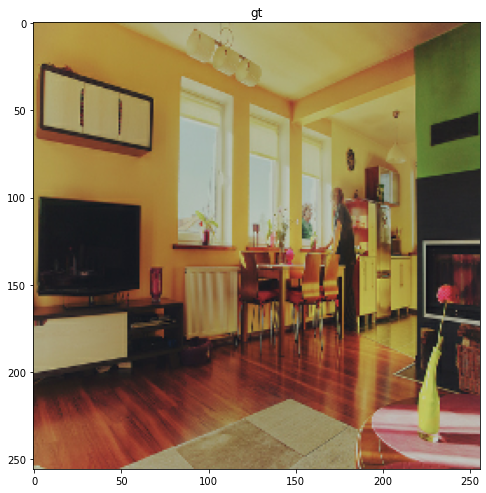

In [6]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
img_path = all_image_paths[0]
plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
# plt.xlabel(caption_image(img_path))
plt.title("gt")
print()

In [7]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [9]:
import IPython.display as display
data_root = "D:\\Personal\\Sanku_tips\\Object_Detection_COCO\\Object_Detection\\COCOdataset2017\\images\\val\\"
def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) "

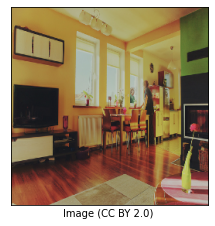

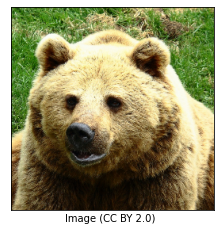

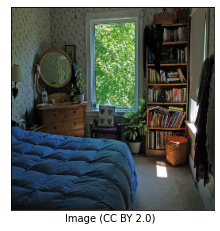

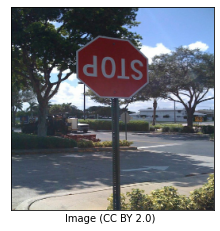

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

In [11]:
#Returns all the annotation data for a given image id
def get_annotations(imgId):
    print(" inside get_annotations imgId type ",type(imgId))
    annIds=coco.getAnnIds(imgIds=imgId)
    anns=coco.loadAnns(annIds)
    segmentations=[]
    segmentation_lengths=[]
    bboxes=[]
    catIds=[]
    iscrowd_list=[]
    area_list=[]
    annotation_ids=[]
    for ann in anns:
        try:
            catId=ann['category_id']
            bbox=ann['bbox']
            segmentation=ann['segmentation'][0]
            iscrowd=ann['iscrowd']
            area=ann['area']
            annotation_id=ann['id']
        except:
            continue
        if((not None in bbox) and (None!=catId)):
            catIds.append(catId)
            segmentations.append(segmentation)
            segmentation_lengths.append(len(segmentation))
            bboxes.append(bbox)
            iscrowd_list.append(iscrowd)
            area_list.append(area)
            annotation_ids.append(annotation_id)
    return len(anns),catIds,segmentation_lengths,sum(segmentations,[]),sum(bboxes,[]),iscrowd_list,area_list,annotation_ids

In [12]:
img_dir=('D:\Personal\Sanku_tips\Object_Detection_COCO\Object_Detection\COCOdataset2017\images\val')
annotations_file="D:\\Personal\\Sanku_tips\\Object_Detection_COCO\\Object_Detection\\COCOdataset2017\\annotations\\instances_val.json"

In [13]:
coco=COCO(annotations_file)

loading annotations into memory...
Done (t=0.80s)
creating index...
index created!


In [14]:
objects,catIds,segmentation_lengths,segmentations,bboxes,iscrowd,area,annotation_ids = get_annotations(139)
print(bboxes)

 inside get_annotations imgId type  <class 'int'>
[236.98, 142.51, 24.7, 69.5, 7.03, 167.76, 149.32, 94.87, 557.21, 209.19, 81.35, 78.73, 358.98, 218.05, 56.0, 102.83, 290.69, 218.0, 61.83, 98.48, 413.2, 223.01, 30.17, 81.36, 317.4, 219.24, 21.58, 11.59, 412.8, 157.61, 53.05, 138.01, 384.43, 172.21, 15.12, 35.74, 512.22, 205.75, 14.74, 15.97, 493.1, 174.34, 20.29, 108.31, 604.77, 305.89, 14.34, 45.71, 613.24, 308.24, 12.88, 46.44, 447.77, 121.12, 13.97, 21.88, 549.06, 309.43, 36.68, 89.67, 350.76, 208.84, 11.37, 22.55, 412.25, 219.02, 9.63, 12.52, 241.24, 194.99, 14.22, 17.63, 336.79, 199.5, 9.73, 16.73, 321.21, 231.22, 125.56, 88.93]


In [49]:
cats = coco.loadCats(coco.getCatIds())
print("Number of categories: {}".format(len(cats)))
cat_names=[cat['name'] for cat in cats]
print('\nCOCO categories: \n{}\n'.format(' '.join(cat_names)))




org_cat_ids = np.array(coco.getCatIds())
print(org_cat_ids)
org_cats = coco.loadCats(org_cat_ids)
print(org_cats)

cat_id=13
result = np.where(org_cat_ids == cat_id)
print("cat location", result[0][0])
print(" cat id nad name ",  cat_id, cat_names[result[0][0]])

Number of categories: 80

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

[ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 67 70 72 73 74 75 76 77 78 79 80 81
 82 84 85 86 87 88 89 90]
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image id =  724
 inside get_annotations imgId type  <class 'int'>
img height and width =  500 375
type of image =  <class 'numpy.ndarray'>



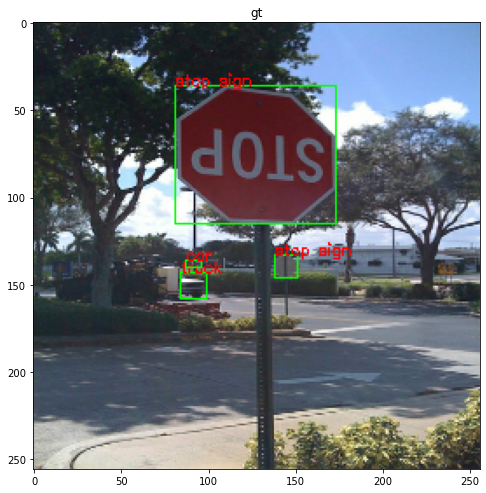

In [50]:
import cv2
from pycocotools.coco import COCO
import numpy as np

def get_image_id(file_path):
    l = file_path.split("\\")[-1]
    l = l.split(".")[0]
    return l


def normalize_boxes(bboxes, coco_img_height,  coco_img_width):
# Convert Boxes from xmin, ymin, width, height format to x0,y0,x1,y1 format

    bboxes[:, 2]=bboxes[:, 0]+bboxes[:, 2]
    bboxes[:, 3]=bboxes[:, 1]+bboxes[:, 3]


    bboxes[:, 0]/=coco_img_width
    bboxes[:, 2]/=coco_img_width
    
    bboxes[:, 1]/=coco_img_height
    bboxes[:, 3]/=coco_img_height
    return bboxes

def load_image_and_label(path):
    image = load_and_preprocess_image(path)
    img_id = get_image_id(path)
    print("image id = ", int(img_id))

    objects,catIds,segmentation_lengths,segmentations,bboxes,iscrowd,area,annotation_ids = get_annotations(int(img_id))

    coco_img = coco.loadImgs(int(img_id))[0]
    print("img height and width = ", coco_img['height'], coco_img['width'])
    bboxes = np.asarray(bboxes)
    bboxes = bboxes.reshape((-1, 4))
    
    # Convert Boxes from xmin, ymin, width, height format to x0,y0,x1,y1 format
    bboxes = normalize_boxes(bboxes, coco_img['height'], coco_img['width'])

    return image, bboxes, catIds


def draw_boxes(img, bboxes, catIds):
    #De-normalize boxes
    img_height, img_width = 256, 256
    bboxes[:, 0]*=img_width
    bboxes[:, 2]*=img_width
    
    bboxes[:, 1]*=img_height
    bboxes[:, 3]*=img_height

    # font
    font = cv2.FONT_HERSHEY_SIMPLEX
    # fontScale
    fontScale = 0.3
    # Blue color in BGR
    color = (255, 0, 0)

    # Line thickness of 2 px
    thickness = 1
    for box, catId in zip(bboxes, catIds):
        cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0,255,0), 1)

        # Write title
        # org
        org = (int(box[0]), int(box[1]))

        result = np.where(org_cat_ids == catId)
        cat_name = cat_names[result[0][0]]
        # Using cv2.putText() method
        image = cv2.putText(img, cat_name, org, font, 
                           fontScale, color, thickness, cv2.LINE_AA)
    return img
    
import matplotlib.pyplot as plt

image_path = all_image_paths[3]
img_path = all_image_paths[3]

img, bboxes, catIds = load_image_and_label(img_path)



img = draw_boxes(img.numpy(), bboxes, catIds)


print("type of image = ", type(img))

plt.imshow(img)
plt.grid(False)
# plt.xlabel(caption_image(img_path))
plt.title("gt")
print()

In [56]:
bboxes = [236.98, 142.51, 24.7, 69.5, 7.03, 167.76, 149.32, 94.87, 557.21, 209.19, 81.35, 78.73, 358.98, 218.05, 56.0, 102.83, 290.69, 218.0, 61.83, 98.48, 413.2, 223.01, 30.17, 81.36, 317.4, 219.24, 21.58, 11.59, 412.8, 157.61, 53.05, 138.01, 384.43, 172.21, 15.12, 35.74, 512.22, 205.75, 14.74, 15.97, 493.1, 174.34, 20.29, 108.31, 604.77, 305.89, 14.34, 45.71, 613.24, 308.24, 12.88, 46.44, 447.77, 121.12, 13.97, 21.88, 549.06, 309.43, 36.68, 89.67, 350.76, 208.84, 11.37, 22.55, 412.25, 219.02, 9.63, 12.52, 241.24, 194.99, 14.22, 17.63, 336.79, 199.5, 9.73, 16.73, 321.21, 231.22, 125.56, 88.93]
bboxes = np.asarray(bboxes)
bboxes = bboxes.reshape((-1, 4))
bboxes

array([[236.98, 142.51,  24.7 ,  69.5 ],
       [  7.03, 167.76, 149.32,  94.87],
       [557.21, 209.19,  81.35,  78.73],
       [358.98, 218.05,  56.  , 102.83],
       [290.69, 218.  ,  61.83,  98.48],
       [413.2 , 223.01,  30.17,  81.36],
       [317.4 , 219.24,  21.58,  11.59],
       [412.8 , 157.61,  53.05, 138.01],
       [384.43, 172.21,  15.12,  35.74],
       [512.22, 205.75,  14.74,  15.97],
       [493.1 , 174.34,  20.29, 108.31],
       [604.77, 305.89,  14.34,  45.71],
       [613.24, 308.24,  12.88,  46.44],
       [447.77, 121.12,  13.97,  21.88],
       [549.06, 309.43,  36.68,  89.67],
       [350.76, 208.84,  11.37,  22.55],
       [412.25, 219.02,   9.63,  12.52],
       [241.24, 194.99,  14.22,  17.63],
       [336.79, 199.5 ,   9.73,  16.73],
       [321.21, 231.22, 125.56,  88.93]])

In [57]:
bboxes[:, 2]=bboxes[:, 0]+bboxes[:, 2]
bboxes[:, 3]=bboxes[:, 1]+bboxes[:, 3]
bboxes

array([[236.98, 142.51, 261.68, 212.01],
       [  7.03, 167.76, 156.35, 262.63],
       [557.21, 209.19, 638.56, 287.92],
       [358.98, 218.05, 414.98, 320.88],
       [290.69, 218.  , 352.52, 316.48],
       [413.2 , 223.01, 443.37, 304.37],
       [317.4 , 219.24, 338.98, 230.83],
       [412.8 , 157.61, 465.85, 295.62],
       [384.43, 172.21, 399.55, 207.95],
       [512.22, 205.75, 526.96, 221.72],
       [493.1 , 174.34, 513.39, 282.65],
       [604.77, 305.89, 619.11, 351.6 ],
       [613.24, 308.24, 626.12, 354.68],
       [447.77, 121.12, 461.74, 143.  ],
       [549.06, 309.43, 585.74, 399.1 ],
       [350.76, 208.84, 362.13, 231.39],
       [412.25, 219.02, 421.88, 231.54],
       [241.24, 194.99, 255.46, 212.62],
       [336.79, 199.5 , 346.52, 216.23],
       [321.21, 231.22, 446.77, 320.15]])

In [41]:
bboxes[:, 0]/=img_width
bboxes[:, 1]/=img_height
bboxes

array([[ 2.3698,  1.4251,  2.47  ,  6.95  ],
       [ 0.0703,  1.6776, 14.932 ,  9.487 ],
       [ 5.5721,  2.0919,  8.135 ,  7.873 ],
       [ 3.5898,  2.1805,  5.6   , 10.283 ],
       [ 2.9069,  2.18  ,  6.183 ,  9.848 ],
       [ 4.132 ,  2.2301,  3.017 ,  8.136 ],
       [ 3.174 ,  2.1924,  2.158 ,  1.159 ],
       [ 4.128 ,  1.5761,  5.305 , 13.801 ],
       [ 3.8443,  1.7221,  1.512 ,  3.574 ],
       [ 5.1222,  2.0575,  1.474 ,  1.597 ],
       [ 4.931 ,  1.7434,  2.029 , 10.831 ],
       [ 6.0477,  3.0589,  1.434 ,  4.571 ],
       [ 6.1324,  3.0824,  1.288 ,  4.644 ],
       [ 4.4777,  1.2112,  1.397 ,  2.188 ],
       [ 5.4906,  3.0943,  3.668 ,  8.967 ],
       [ 3.5076,  2.0884,  1.137 ,  2.255 ],
       [ 4.1225,  2.1902,  0.963 ,  1.252 ],
       [ 2.4124,  1.9499,  1.422 ,  1.763 ],
       [ 3.3679,  1.995 ,  0.973 ,  1.673 ],
       [ 3.2121,  2.3122, 12.556 ,  8.893 ]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


type of image =  <class 'tensorflow.python.framework.ops.EagerTensor'>
 bboxes =  [[236.98, 142.51, 24.7, 69.5], [7.03, 167.76, 149.32, 94.87], [557.21, 209.19, 81.35, 78.73], [358.98, 218.05, 56.0, 102.83], [290.69, 218.0, 61.83, 98.48], [413.2, 223.01, 30.17, 81.36], [317.4, 219.24, 21.58, 11.59], [412.8, 157.61, 53.05, 138.01], [384.43, 172.21, 15.12, 35.74], [512.22, 205.75, 14.74, 15.97], [493.1, 174.34, 20.29, 108.31], [604.77, 305.89, 14.34, 45.71], [613.24, 308.24, 12.88, 46.44], [447.77, 121.12, 13.97, 21.88], [549.06, 309.43, 36.68, 89.67], [350.76, 208.84, 11.37, 22.55], [412.25, 219.02, 9.63, 12.52], [241.24, 194.99, 14.22, 17.63], [336.79, 199.5, 9.73, 16.73], [321.21, 231.22, 125.56, 88.93]]



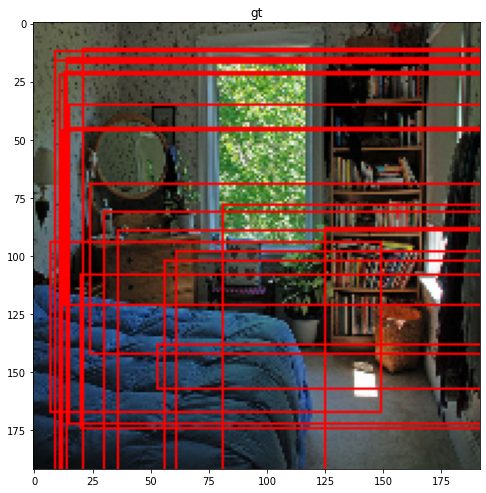

In [24]:
img_path = "D:\\Personal\\Sanku_tips\\Object_Detection_COCO\\Object_Detection\\COCOdataset2017\\images\\val\\000000000632.jpg"
img = load_and_preprocess_image(img_path)
print("type of image = ", type(img))

# bboxes = [[5, 5, 220, 220], [50, 50, 100, 100]]
print(" bboxes = ", bboxes)

def draw_boxes(img, bboxes):
    for box in bboxes:
        cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255,0,0), 1)
    return img

img = draw_boxes(img.numpy(), bboxes)
plt.imshow(img)
plt.grid(False)
# plt.xlabel(caption_image(img_path))
plt.title("gt")
print()